## Importing Libraries and Data

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
import math

### Import data

In [2]:
cwd = os.getcwd()
simp_path = 'raw_data/df.csv'
abs_path = os.path.abspath(os.path.join(cwd,'..',simp_path))
df_sarimax = pd.read_csv(abs_path)

In [3]:
#cheking my dataframe
df_sarimax.head()

,ticker,open,close,adj_close,low,high,volume,date,sector
0,AAPL,0.513393,0.513393,0.023186,0.513393,0.515625,117258400,1980-12-12,TECHNOLOGY
1,AAPL,0.488839,0.486607,0.021977,0.486607,0.488839,43971200,1980-12-15,TECHNOLOGY
2,AAPL,0.453125,0.450893,0.020364,0.450893,0.453125,26432000,1980-12-16,TECHNOLOGY
3,AAPL,0.462054,0.462054,0.020868,0.462054,0.464286,21610400,1980-12-17,TECHNOLOGY
4,AAPL,0.475446,0.475446,0.021473,0.475446,0.477679,18362400,1980-12-18,TECHNOLOGY


In [4]:
# Transforming the data into a datetime format
df_sarimax["date"] = pd.to_datetime(df_sarimax["date"], infer_datetime_format=True)
df_sarimax.head()

,ticker,open,close,adj_close,low,high,volume,date,sector
0,AAPL,0.513393,0.513393,0.023186,0.513393,0.515625,117258400,1980-12-12,TECHNOLOGY
1,AAPL,0.488839,0.486607,0.021977,0.486607,0.488839,43971200,1980-12-15,TECHNOLOGY
2,AAPL,0.453125,0.450893,0.020364,0.450893,0.453125,26432000,1980-12-16,TECHNOLOGY
3,AAPL,0.462054,0.462054,0.020868,0.462054,0.464286,21610400,1980-12-17,TECHNOLOGY
4,AAPL,0.475446,0.475446,0.021473,0.475446,0.477679,18362400,1980-12-18,TECHNOLOGY


In [5]:
#Setting a new data index for my dataframe 
df_sarimax.reset_index()
df_sarimax = df_sarimax.set_index(df_sarimax["date"])
df_sarimax = df_sarimax.drop("date", axis=1)
df_sarimax.head()

,ticker,open,close,adj_close,low,high,volume,sector
date,,,,,,,,
1980-12-12,AAPL,0.513393,0.513393,0.023186,0.513393,0.515625,117258400,TECHNOLOGY
1980-12-15,AAPL,0.488839,0.486607,0.021977,0.486607,0.488839,43971200,TECHNOLOGY
1980-12-16,AAPL,0.453125,0.450893,0.020364,0.450893,0.453125,26432000,TECHNOLOGY
1980-12-17,AAPL,0.462054,0.462054,0.020868,0.462054,0.464286,21610400,TECHNOLOGY
1980-12-18,AAPL,0.475446,0.475446,0.021473,0.475446,0.477679,18362400,TECHNOLOGY


## Decomposition

In [6]:
df_sarimax = df_sarimax[(df_sarimax.index)>"1999-12-31"]
df_sarimax.head()

,ticker,open,close,adj_close,low,high,volume,sector
date,,,,,,,,
2000-01-03,AAPL,3.745536,3.997768,2.686497,3.631696,4.017857,133949200,TECHNOLOGY
2000-01-04,AAPL,3.866071,3.660714,2.459998,3.613839,3.950893,128094400,TECHNOLOGY
2000-01-05,AAPL,3.705357,3.714286,2.495997,3.678571,3.948661,194580400,TECHNOLOGY
2000-01-06,AAPL,3.790179,3.392857,2.279998,3.392857,3.821429,191993200,TECHNOLOGY
2000-01-07,AAPL,3.446429,3.553571,2.387998,3.410714,3.607143,115183600,TECHNOLOGY


In [7]:
#Selecting the stock "T": Telekom to work with it 
df_telekom = df_sarimax[df_sarimax["ticker"]== "T"]
df_telekom.head()

,ticker,open,close,adj_close,low,high,volume,sector
date,,,,,,,,
2000-01-03,T,48.5625,47.0000,19.225044,46.6250,49.00,5791900,PUBLIC UTILITIES
2000-01-04,T,47.0625,44.2500,18.100174,43.5000,47.75,7173600,PUBLIC UTILITIES
2000-01-05,T,45.0000,44.9375,18.381397,44.4375,45.25,9090000,PUBLIC UTILITIES
2000-01-06,T,44.5625,43.7500,17.993273,43.1250,45.00,7153600,PUBLIC UTILITIES
2000-01-07,T,44.5625,44.1250,18.147497,43.3750,44.75,5885600,PUBLIC UTILITIES


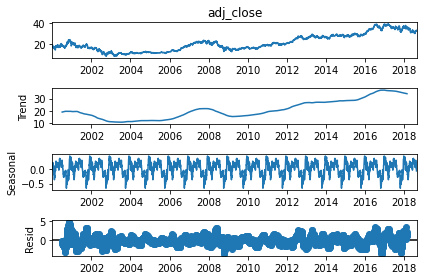

In [21]:
#Checking the additive decomposition (y = Trend * Seasonal * Residuals)
#periods 5(weekly), 20(monthly), 253(yearly)
result_add_T = seasonal_decompose(df_telekom['adj_close'], model='additive', period=253)
result_add_T.plot();

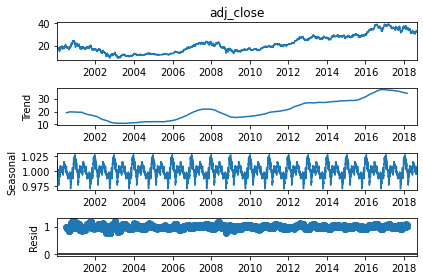

In [22]:
#Multiplicative Decomposition
result_mult_T = seasonal_decompose(df_telekom['adj_close'], model='multiplicative', period=253)
result_mult_T.plot();

### checking stationality

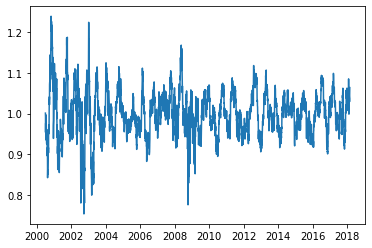

In [23]:
#Plot the residuals from multiplicative
plt.plot(result_mult_T._resid);

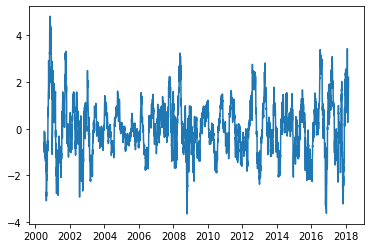

In [24]:
#Plot the residuals from additive
plt.plot(result_add_T._resid);

In [25]:
#Removing nan values from additive
result_observed_add=result_add_T.resid.dropna()

In [26]:
#Removing nan values from multiplicative
result_observed_mult=result_mult_T.resid.dropna()

In [27]:
#Test with dickey fuller test additive
adfuller(result_observed_add)[1]

1.1473483148038672e-14

In [28]:
#Test with dickey fuller test multiplicative
adfuller(result_observed_mult)[1]

1.1976801680390142e-13

### Autocorrelation

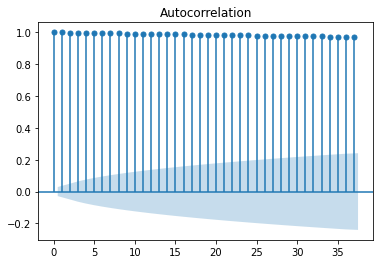

In [29]:
#Plotting autocorrelation "adj_close"
y = df_telekom.adj_close
plot_acf(y);

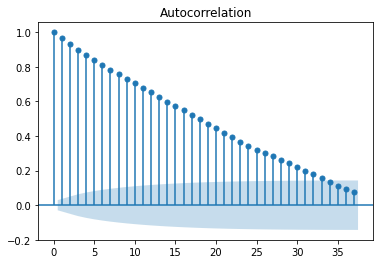

In [30]:
#plot the multiplicative residuals with acf 
plot_acf(result_observed_mult);

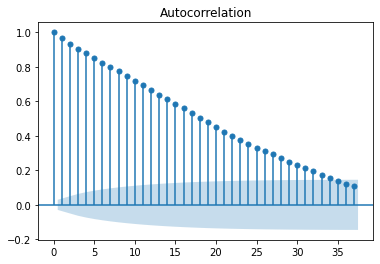

In [31]:
#plot the additive residuals with acf 
plot_acf(result_observed_add);

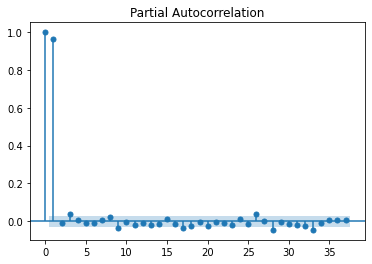

In [32]:
#plot the multiplicative residuals with pacf 
plot_pacf(result_observed_mult);

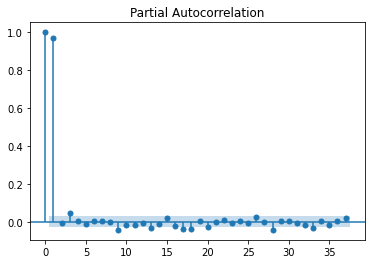

In [33]:
#plot the additive residuals with pacf 
plot_pacf(result_observed_add);

## Building the Model (SARIMAX)

### Splitting the data (train/test)

In [34]:
#Split the data in train / test 
df_telekom_train = df_telekom[:"2014"]
df_telekom_test = df_telekom["2015":]
print(df_telekom_train.shape)
print(df_telekom_test.shape)

(3773, 8)
(919, 8)


In [35]:
#use the auto arima and train data to get the parameters
model = pm.auto_arima(df_telekom_train["adj_close"],
                      m=5, # frequency of series. Important to choose manually
                      seasonal=True,
                      stepwise=True,  # only check most interesting combination. False will take way longer.
                      start_p=0, max_p=2,
                      start_d=0, max_d=1,
                      start_q=0, max_q=2,
                      start_P=0, max_P=2,
                      start_D=0, max_D=2,
                      start_Q=0, max_Q=2,
                      njobs=-1, trace=True, error_action="ignore",  suppress_warnings=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=1490.191, Time=0.40 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=1493.197, Time=2.64 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=1493.192, Time=3.59 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=1488.405, Time=0.20 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=1491.501, Time=0.83 sec
 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=1491.536, Time=2.13 sec
 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=1493.931, Time=2.05 sec
 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=1491.939, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=1491.904, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=1477.361, Time=1.93 sec
 ARIMA(1,1,1)(1,0,0)[5] intercept   : AIC=1479.349, Time=10.53 sec
 ARIMA(1,1,1)(0,0,1)[5] intercept   : AIC=1479.349, Time=7.55 sec
 ARIMA(1,1,1)(1,0,1)[5] intercept   : AIC=1481.224, Time=12.32 sec
 ARIMA(2,1,1)(0,0,0)[5] intercept   : AIC=1473.300, Time=2.27 sec
 ARIMA(2,1,1)(1,0,0)[5] interce

In [36]:
#Best model params
#ARIMA(1,1,2)(0,0,0)[5] m=5

### Define the model

In [47]:
#Specify training data
data = df_telekom_train["adj_close"]
#Define the model configuration
my_order = (1, 1, 2)
my_seasonal_order = (0, 0, 0, 5)
#Define the model 
model_sarimax = SARIMAX(df_telekom_train["adj_close"], order=my_order, seasonal_order=my_seasonal_order)
#Fit the model 
model_fit = model_sarimax.fit()

/home/luis/.pyenv/versions/3.8.6/envs/stock_prices_predictions/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/luis/.pyenv/versions/3.8.6/envs/stock_prices_predictions/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


### First prediction

In [42]:
df_telekom_test.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16',
               '2018-08-17', '2018-08-20', '2018-08-21', '2018-08-22',
               '2018-08-23', '2018-08-24'],
              dtype='datetime64[ns]', name='date', length=919, freq=None)

In [43]:
#Forecast
n_periods = len(df_telekom_test["adj_close"])
forecast = model_fit.get_forecast(steps = n_periods)
index_y_test = df_telekom_test.index 

/home/luis/.pyenv/versions/3.8.6/envs/stock_prices_predictions/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [48]:
forecast.summary_frame()

adj_close,mean,mean_se,mean_ci_lower,mean_ci_upper
3773,27.581877,0.293761,27.006117,28.157638
3774,27.598977,0.412969,26.789571,28.408382
3775,27.609887,0.494858,26.639983,28.579791
3776,27.616848,0.559668,26.519920,28.713777
3777,27.621290,0.614716,26.416468,28.826112
...,...,...,...,...
4687,27.629120,7.315642,13.290725,41.967515
4688,27.629120,7.319631,13.282907,41.975334
4689,27.629120,7.323618,13.275092,41.983149
4690,27.629120,7.327603,13.267282,41.990959


In [49]:
#Putting my forecast results into a dataframe to work with it
forecast_df = forecast.summary_frame()
forecast_df.head()

adj_close,mean,mean_se,mean_ci_lower,mean_ci_upper
3773,27.581877,0.293761,27.006117,28.157638
3774,27.598977,0.412969,26.789571,28.408382
3775,27.609887,0.494858,26.639983,28.579791
3776,27.616848,0.559668,26.519920,28.713777
3777,27.621290,0.614716,26.416468,28.826112


In [50]:
#add a column with the date (from df_telekom)
forecast_df["date"] = df_telekom_test.index
forecast_df.head()

adj_close,mean,mean_se,mean_ci_lower,mean_ci_upper,date
3773,27.581877,0.293761,27.006117,28.157638,2015-01-02
3774,27.598977,0.412969,26.789571,28.408382,2015-01-05
3775,27.609887,0.494858,26.639983,28.579791,2015-01-06
3776,27.616848,0.559668,26.519920,28.713777,2015-01-07
3777,27.621290,0.614716,26.416468,28.826112,2015-01-08


In [54]:
#setting my forecast_df with a date index
forecast_df.reset_index()
forecast_df = forecast_df.set_index(forecast_df["date"])
forecast_df = forecast_df.drop("date", axis=1)

In [55]:
#checking the result
forecast_df.head()

adj_close,mean,mean_se,mean_ci_lower,mean_ci_upper
date,,,,
2015-01-02,27.581877,0.293761,27.006117,28.157638
2015-01-05,27.598977,0.412969,26.789571,28.408382
2015-01-06,27.609887,0.494858,26.639983,28.579791
2015-01-07,27.616848,0.559668,26.519920,28.713777
2015-01-08,27.621290,0.614716,26.416468,28.826112


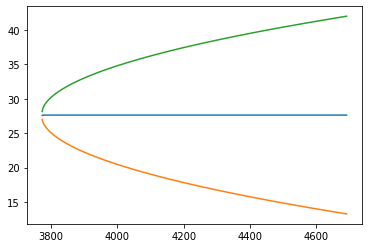

In [52]:
#Having a first view of my results
plt.plot(forecast_df["mean"])
plt.plot(forecast_df["mean_ci_lower"])
plt.plot(forecast_df["mean_ci_upper"]);

In [61]:
df_telekom_test.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16',
               '2018-08-17', '2018-08-20', '2018-08-21', '2018-08-22',
               '2018-08-23', '2018-08-24'],
              dtype='datetime64[ns]', name='date', length=919, freq=None)

In [63]:
#Make series for plotting purpose
central = pd.Series(forecast_df["mean"], index=df_telekom_test.index)
lower = pd.Series(forecast_df["mean_ci_lower"], index=df_telekom_test.index)
upper = pd.Series(forecast_df["mean_ci_upper"], index=df_telekom_test.index)

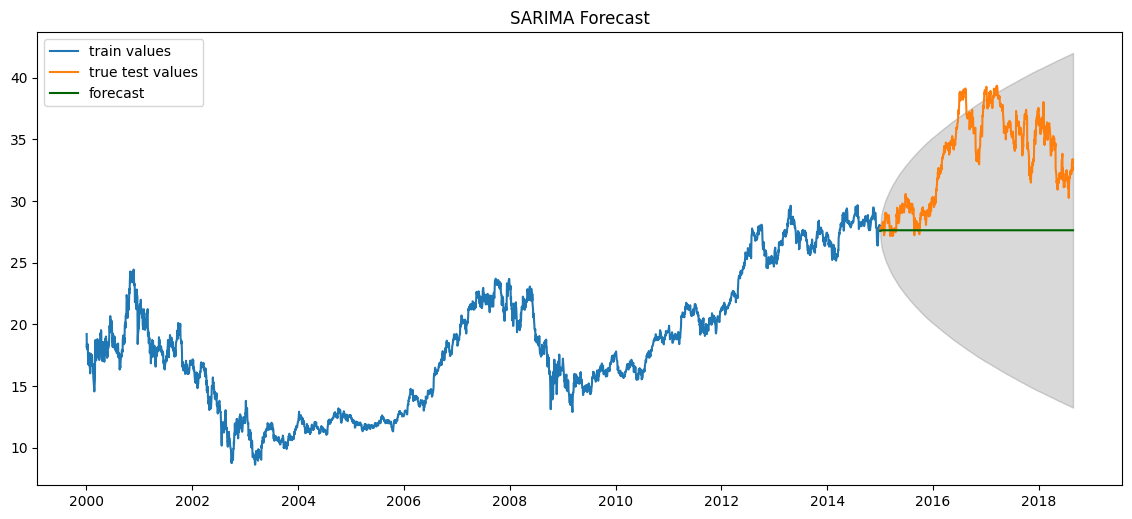

In [64]:
#Plotting my predictions against reality
plt.figure(figsize=(14,6), dpi=100)
plt.plot(df_telekom_train["adj_close"], label="train values")
plt.plot(df_telekom_test["adj_close"], label="true test values")
plt.plot(central, color="darkgreen", label="forecast")
plt.fill_between(lower.index, 
                lower,
                upper,
                color="k", alpha=.15)

plt.title("SARIMA Forecast")
plt.legend()
plt.show()